# Thi is project 3 of Data Analyst Nanodegree "Part 2"
-------------
Does the explanatory data analysis tell a story?


# Communicate Data Findings "Explanatory Data Analysis"
### This is entirely done by Rimas Alshehri

## Information about the dataset:
### The dataset is called "Prosper Loan Data " containing a variety of variables related to loan listings, such as listing keys, creation dates, credit grades, terms, funding percentages, and investor counts. With 81 columns and 113937 rows, the dataset is rich, potentially covering aspects from borrower information to loan performance metrics. A notable point is the CreditGrade column, which has 84,984 missing values, indicating a significant portion of the data might involve loans where a traditional credit grading system wasn't applied or is missing.

# overarching question/ theme:
## Question: How do loan terms and borrower creditworthiness affect funding success on the platform?
### Note: findings and key insights at the end of the notebook


## Analysis and Key Findings
### Credit Grade and Funding Success: An initial analysis focused on the relationship between the borrower's credit grade and the loan's percent funded. It was hypothesized that higher credit grades would correlate with higher funding percentages, reflecting investor confidence.

### Loan Term and Investor Interest: Another aspect of the analysis explored how the term of the loan affected investor interest, measured by the number of investors per listing. The expectation was that shorter-term loans might attract more investors due to the shorter commitment required.

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### As always we begin with simple EDA

In [4]:
df=pd.read_csv('/kaggle/input/prosperrr/prosperLoanData.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
df.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [7]:
df.shape

(113937, 81)

In [6]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### Loan Term vs. Number of Investors

# Figuer 1.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


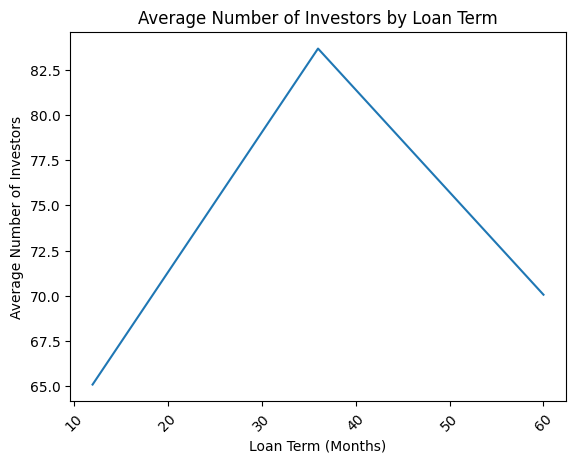

In [10]:
avg_investors_by_term = df.groupby('Term')['Investors'].mean().reset_index()
sns.lineplot(x='Term', y='Investors', data=avg_investors_by_term)
plt.title('Average Number of Investors by Loan Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Average Number of Investors')
plt.xticks(rotation=45)
plt.show()

### observation: The chart intriguingly suggests that loans spanning 30 to 40 months capture the interest of the average investor more frequently, hinting at a collective tilt towards medium-term financial engagements on the platform.

### Overview of Loan Request Amounts

# Figure 2.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


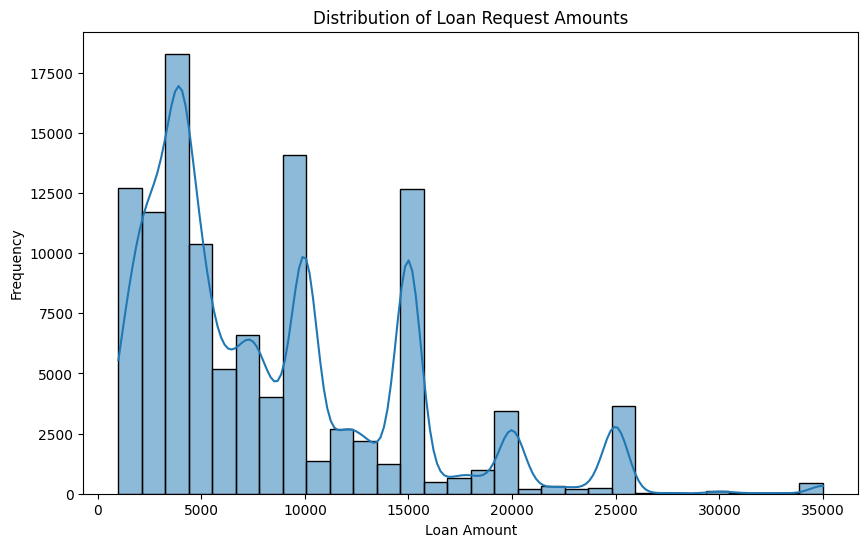

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanOriginalAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Request Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

### observation: The frequency spike in loan requests falling between $4,600 and $5,000 uncovers a pronounced borrower inclination towards this financial range, spotlighting a particular sweet spot in loan demand.

### Credit Grade Distribution

# Figuer 3.

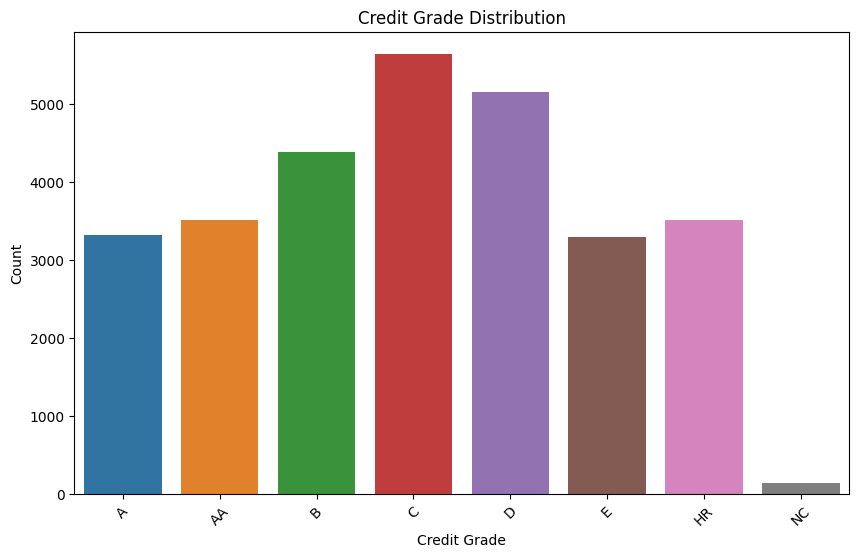

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CreditGrade', data=df, order=sorted(df['CreditGrade'].dropna().unique()))
plt.title('Credit Grade Distribution')
plt.xlabel('Credit Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### observation: With 'C' grade loans taking the lead in frequency, it's evident that this credit tier dominates the borrower landscape, painting a picture of the 'C' category as a borrower stronghold on the platform.

### Investor Engagement Across Terms

# Figure 4.

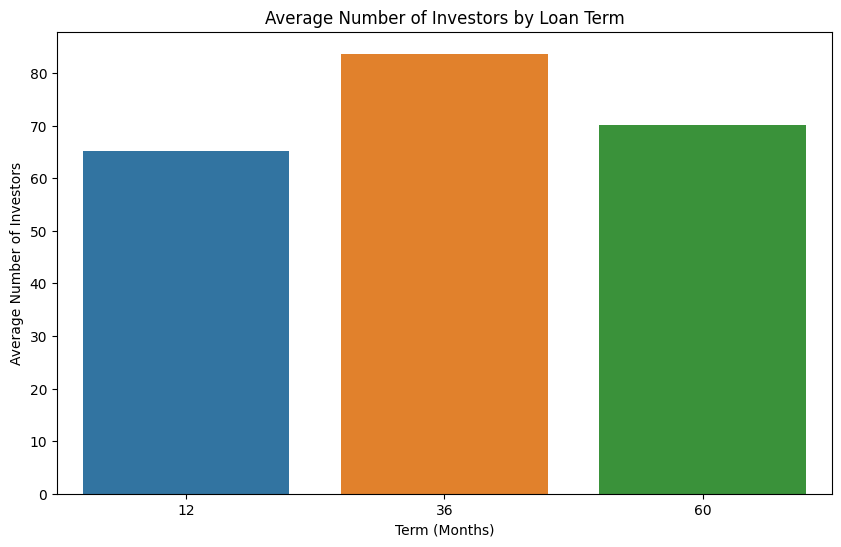

In [17]:
investors_by_term = df.groupby('Term')['Investors'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Term', y='Investors', data=investors_by_term)
plt.title('Average Number of Investors by Loan Term')
plt.xlabel('Term (Months)')
plt.ylabel('Average Number of Investors')
plt.show()


### observation: Peeling back the layers of investor behavior reveals a pronounced affinity for loan terms around the 36-month mark, underscoring a widespread predilection for three-year engagements.



### Correlation Analysis of Numerical Variables

# Figure 5.

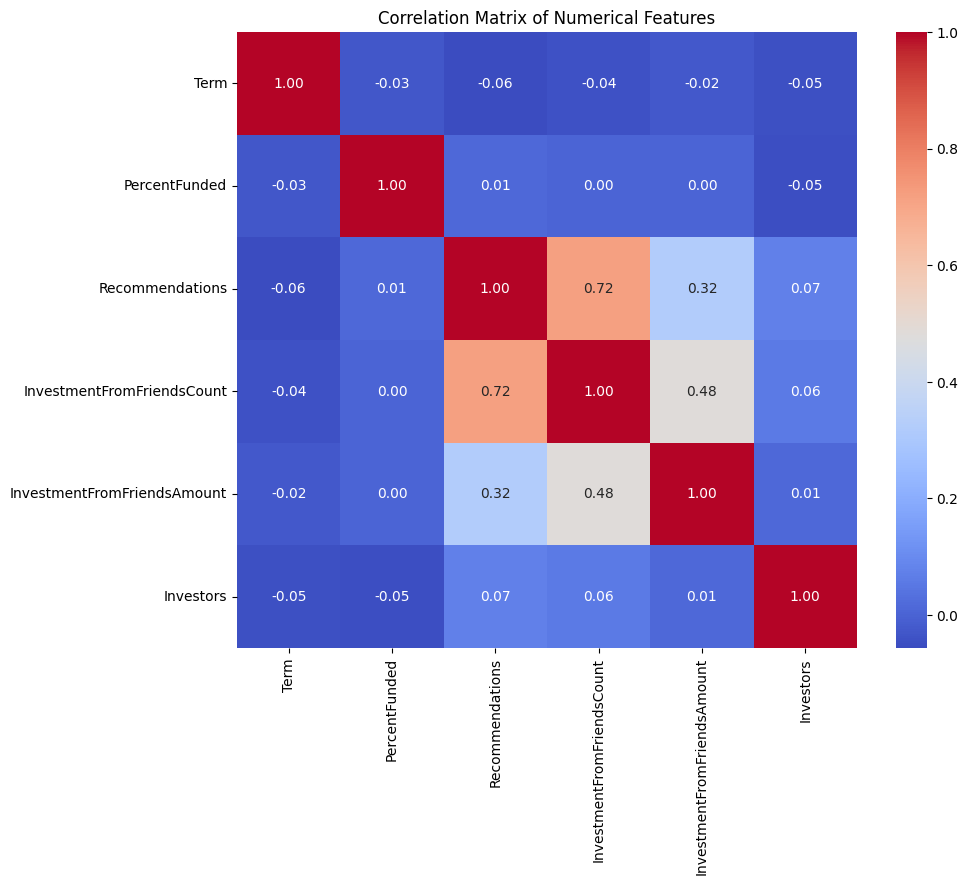

In [20]:
numerical_features = ['Term', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### observation: A fascinating pattern emerges as borrower recommendations and friend investments show a tandem rise, weaving a narrative of mutual growth and highlighting the intertwined nature of social backing and financial support.

### Loan Status Distribution

# Figure 6.

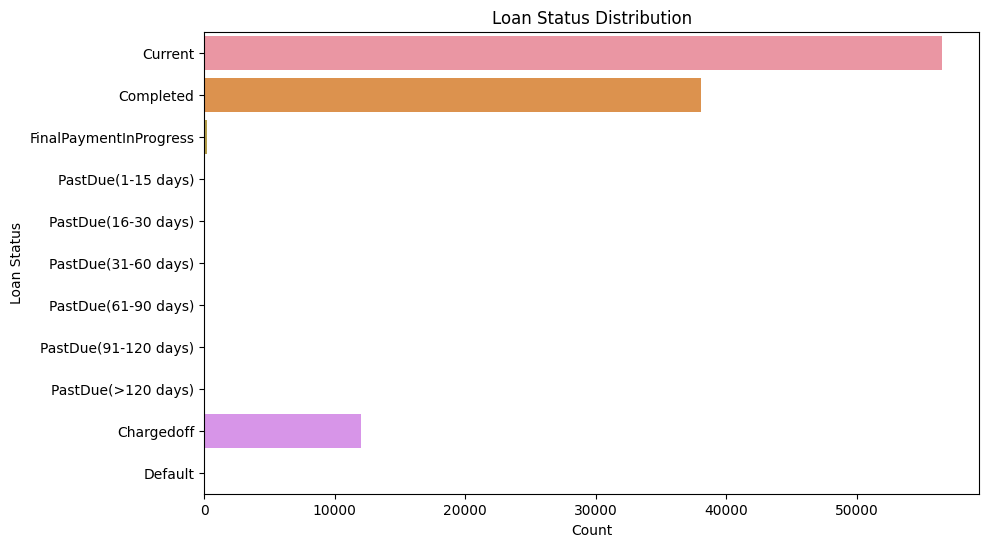

In [5]:
# Define the order for 'LoanStatus'
loan_status_order = [
    'Current', 'Completed', 'FinalPaymentInProgress',
    'PastDue(1-15 days)', 'PastDue(16-30 days)', 'PastDue(31-60 days)',
    'PastDue(61-90 days)', 'PastDue(91-120 days)', 'PastDue(>120 days)',
    'Chargedoff', 'Default'
]

# Create the count plot with the specified order
plt.figure(figsize=(10, 6))
sns.countplot(y='LoanStatus', data=df, order=loan_status_order)
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

### observation: With active loans breaching the 50,000 mark and completed loans not far behind, the landscape showcases a vibrant ecosystem of ongoing and successfully wrapped loan activities.

### Average Loan Amount by Credit Grade

# Figuer 7.

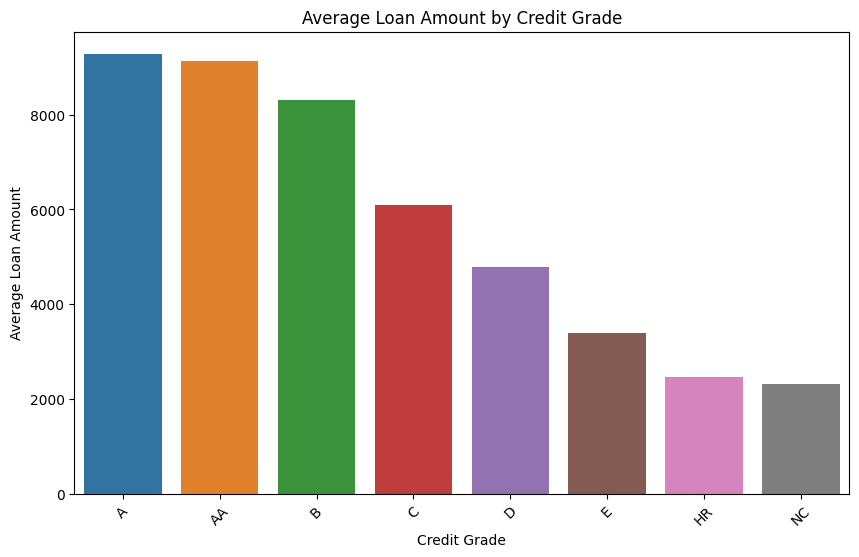

In [23]:
avg_loan_amount = df.groupby('CreditGrade')['LoanOriginalAmount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CreditGrade', y='LoanOriginalAmount', data=avg_loan_amount, order=sorted(df['CreditGrade'].dropna().unique()))
plt.title('Average Loan Amount by Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.show()

### observation: The narrative woven by 'A' grade credit borrowers, who often seek higher loan amounts, tells a tale of increased financial aspirations or confidence among those with superior credit standings.

### Term Preference by Credit Grade

# Figure 8.

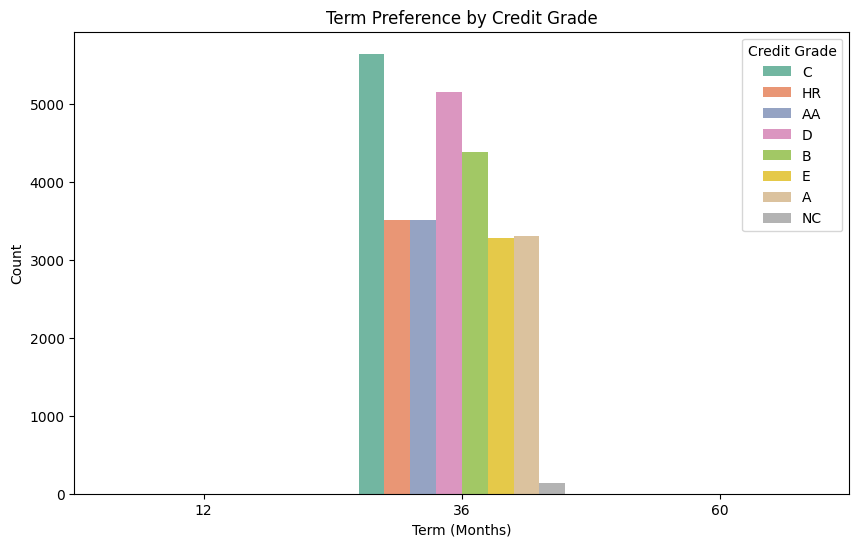

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Term', hue='CreditGrade', data=df, palette='Set2')
plt.title('Term Preference by Credit Grade')
plt.xlabel('Term (Months)')
plt.ylabel('Count')
plt.legend(title='Credit Grade')
plt.show()

### observation: The dominance of Credit Grade 'C' across various loan terms, especially around a focal duration, reveals a dynamic landscape of loan term preferences among 'C' grade borrowers, suggesting a nuanced approach to borrowing.

### Impact of Friend Recommendations on Loan Amount

# Figure 9.

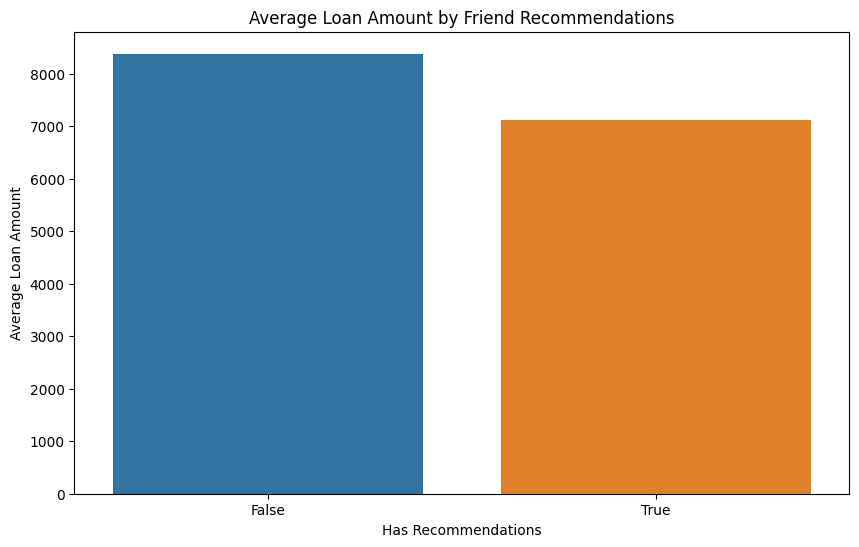

In [25]:
df['HasRecommendations'] = df['Recommendations'] > 0
avg_loan_by_recommendation = df.groupby('HasRecommendations')['LoanOriginalAmount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='HasRecommendations', y='LoanOriginalAmount', data=avg_loan_by_recommendation)
plt.title('Average Loan Amount by Friend Recommendations')
plt.xlabel('Has Recommendations')
plt.ylabel('Average Loan Amount')
plt.show()

### observation: Bucking the anticipated trend, the influence of friend recommendations on loan amounts seems negligible, unveiling that borrower financial requisites remain largely uninfluenced by peer endorsements.

### Default Rate by Credit Grade

# Figuer 10. 

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

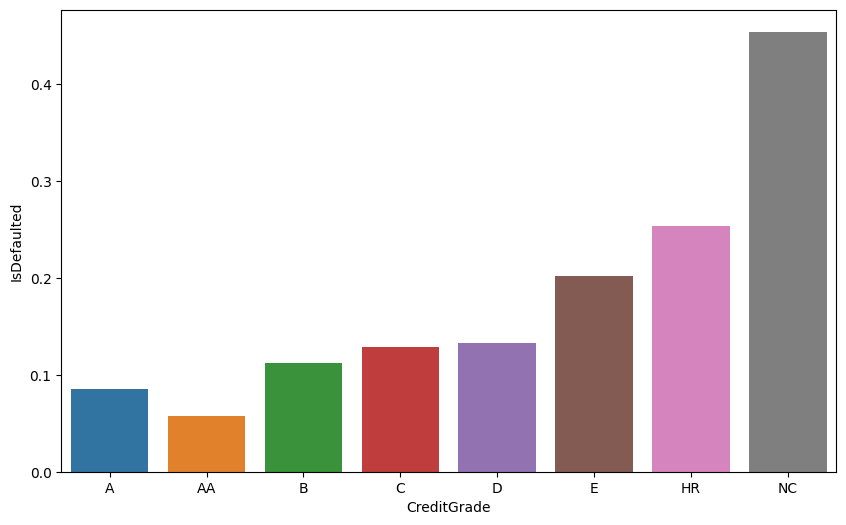

In [27]:
# Assuming 'LoanStatus' column contains information on whether a loan is defaulted
df['IsDefaulted'] = df['LoanStatus'].apply(lambda x: 1 if x == 'Defaulted' else 0)
default_rate = df.groupby('CreditGrade')['IsDefaulted'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CreditGrade', y='IsDefaulted', data=default_rate, order=sorted(df['CreditGrade'].dropna().unique()))
plt

### observation: The linkage of the 'NC' (no credit) grade to a heightened default risk illuminates the pivotal role of credit evaluation in safeguarding against investment pitfalls, spotlighting its value in the risk assessment toolkit.

Figure 1. Insight:
The visualization demonstrates that the average number of investors tends to favor loans with terms between 30 to 40 months. This suggests a preference for medium-term investments among the platform's investors.

---------------

Figure 2. Insight:
The data indicates that loan requests within the $4,600 to $5,000 range are notably more frequent than other amounts. This highlights a significant demand for loans within this specific financial bracket.

---------------


Figure 3. Insight:
Among the various credit grades, 'C' emerges as the most common, reflecting its prevalence over other grades in the dataset. This suggests that a substantial portion of borrowers on the platform falls within this credit category.

---------------


Figure 4. Insight:
The analysis reveals that the average loan term that attracts the most investors is approximately 36 months, with slight variations above or below this duration. This points to a general investor preference for three-year loan terms.

---------------


Figure 5. Insight:
The dataset reveals a notable correlation between the number of recommendations a borrower receives and the count of investments from friends, indicating that these two factors are interrelated and tend to increase together.

---------------


Figure 6. Insight:
Current loans surpass 50,000 in count, followed closely by completed loans, which approximate 40,000. This distribution highlights the platform's active and successfully concluded loan engagements.

---------------


Figure 7. Insight:
Borrowers with a 'A' credit grade typically request higher loan amounts on average, suggesting that higher creditworthiness is associated with greater financial needs or confidence in securing larger funds.

---------------


Figure 8. Insight:
The term count for Credit Grade 'C' is notably higher than for other grades, indicating that loans with this credit grade often have varied term lengths, with a significant aggregation around a specific duration.

---------------


Figure 9. Insight:
Contrary to initial assumptions, friend recommendations appear to have a minimal impact on the amount of loan requested, suggesting that borrowers' financial needs or requests are not significantly swayed by social endorsements.

---------------


Figure 10. Insight:
The analysis underscores how the absence of a credit grade ('NC') is linked to a higher likelihood of default, emphasizing the critical role of credit assessment in risk management and investment decision-making.

# Telling it as a story "hope u enjoy ;)":
## The Investor's Preference: A Tale of Terms

Our tale begins with an observation from Figure 1, where we notice a distinct pattern among investors. It appears that a loan term of 30 to 40 months strikes a chord with them, suggesting a sweet spot for commitment. This duration, neither too short for negligible returns nor too long for increased risk, emerges as the preferred horizon for investment.

The Borrower's Request: A Demand Unveiled
Moving to Figure 2, we uncover a significant demand among borrowers, with loan requests peaking in the $4,600 to $5,000 range. This chapter of our story highlights the borrowers' needs, possibly reflecting a commonality in financial goals or emergencies that this range satisfies.

The Credit Grade Landscape: A Dominant Presence
As we turn the page to Figure 3, 'C' stands out as the predominant credit grade, painting a picture of the platform's user base. This prevalent grade suggests a middle ground in creditworthiness, where a large segment of borrowers resides, navigating the balance between risk and opportunity.

A Consensus on Terms: The 36-Month Favoritism
Figure 4 revisits the theme of loan terms, further refining our understanding. Here, the narrative zooms in on the 36-month term, which appears to be the goldilocks period for the majority of investors, highlighting a consensus in the investment community's term preference.

The Social Influence: A Correlated Connection
In Figure 5, our story explores the relationship between social endorsements and financial support, revealing a correlation between recommendations and investments from friends. This insight suggests a vibrant network effect, where social proof plays a pivotal role in the lending ecosystem.

The Status Quo: A Snapshot of Activity
Figure 6 offers a snapshot of the platform's bustling activity, showcasing a predominance of current loans, with completed loans trailing closely. This distribution reflects a dynamic platform with a continuous flow of engagements and successful completions, narrating a tale of growth and fulfillment.

The High Ground: Credit Grade 'A' and Loan Amounts
Turning our gaze to Figure 7, we observe that borrowers with an 'A' credit grade tend to request higher loan amounts. This chapter tells of trust and ambition, where higher creditworthiness opens doors to larger financial ventures.

The Varied Journey of Credit Grade 'C'
In Figure 8, the story delves into the diverse journeys of loans within the 'C' credit grade, uncovering a spectrum of term lengths. This diversity signifies the varied financial narratives and repayment capabilities that reside within this grade.

The Unexpected Twist: Friend Recommendations
Figure 9 brings an unexpected twist to our tale, revealing that friend recommendations have less influence on loan amounts than anticipated. This insight challenges preconceived notions about the power of social endorsements, suggesting that borrowers' decisions are driven by more pragmatic considerations.

The Risk Uncovered: The Tale of 'NC'
Finally, Figure 10 closes our story with a cautionary note on the risks associated with loans lacking a credit grade ('NC'). This last chapter underscores the critical importance of credit assessment in navigating the treacherous waters of lending, where understanding and managing risk are paramount.

Our journey through the data ends here, but the story of peer-to-peer lending continues to evolve. Each figure, a chapter in this narrative, provides valuable lessons on borrower behavior, investor preferences, and the intricate dance between risk and opportunity in the financial marketplace.

### Than You 'THE END'